Importing the libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Reading the dataset (.csv file) into a dataframe

In [16]:
df = pd.read_csv("data sources/Zomatodataset/zomato.csv",encoding='latin-1') # using latin-1, since it had utf-8 thingy
df.head(2)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591


Descriptive Analysis :
- Finding the no. of cols & rows
- Finding the name of cols
- Find info about the dataset
- Find the 5 number summary
- Find the data types

In [23]:
print(df.shape) # no. of rows & cols

(9551, 21)


In [24]:
print(df.columns) # list column names

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='str')


In [26]:
# indepth info about the dataset :
# 1) no. of entries,
# 2) column names
# 3) no. of non-null values
# 4) datatypes
# 5) total count of same datatypes
# 6) memory usage of the dataframe
print(df.info()) 

<class 'pandas.DataFrame'>
RangeIndex: 9551 entries, 0 to 9550
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Restaurant ID         9551 non-null   int64  
 1   Restaurant Name       9551 non-null   str    
 2   Country Code          9551 non-null   int64  
 3   City                  9551 non-null   str    
 4   Address               9551 non-null   str    
 5   Locality              9551 non-null   str    
 6   Locality Verbose      9551 non-null   str    
 7   Longitude             9551 non-null   float64
 8   Latitude              9551 non-null   float64
 9   Cuisines              9542 non-null   str    
 10  Average Cost for two  9551 non-null   int64  
 11  Currency              9551 non-null   str    
 12  Has Table booking     9551 non-null   str    
 13  Has Online delivery   9551 non-null   str    
 14  Is delivering now     9551 non-null   str    
 15  Switch to order menu  9551 non-n

In [29]:
# 5 number summary of the dataframe: count, mean, std, min, 25%, 50%, 75%, max
print(df.describe()) 

       Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000        

In [ ]:
print(df.dtypes) # data types of columns

Restaurant ID             int64
Restaurant Name             str
Country Code              int64
City                        str
Address                     str
Locality                    str
Locality Verbose            str
Longitude               float64
Latitude                float64
Cuisines                    str
Average Cost for two      int64
Currency                    str
Has Table booking           str
Has Online delivery         str
Is delivering now           str
Switch to order menu        str
Price range               int64
Aggregate rating        float64
Rating color                str
Rating text                 str
Votes                     int64
dtype: object


Find null values

In [32]:
# total null values in each col
print(df.isnull().sum())

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
dtype: int64


In [ ]:
# generating a list of columns which have null values in them using list comprehension
null_cols = [features for features in df.columns if df[features].isnull().sum()>0]
print(null_cols)

['Cuisines']


<Axes: >

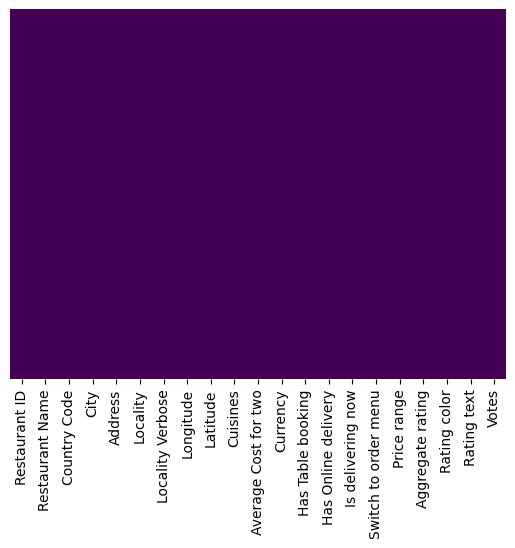

In [37]:
# making a heatmap showing null vals
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Join 2 datasets

In [ ]:
# reading the other datasets
country_df = pd.read_excel("data sources/Zomatodataset/Country-Code.xlsx")
country_df.head()

,Country Code,Country
0,1,India
1,14,Australia
2,30,Brazil
3,37,Canada
4,94,Indonesia


In [44]:
# merging the df and country_df using the common feature 'country code' from 'left'

merged_df = pd.merge(df,country_df,on='Country Code', how='left')
print(merged_df.head(2))


   Restaurant ID   Restaurant Name  Country Code         City  \
0        6317637  Le Petit Souffle           162  Makati City   
1        6304287  Izakaya Kikufuji           162  Makati City   

                                             Address  \
0  Third Floor, Century City Mall, Kalayaan Avenu...   
1  Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   

                                     Locality  \
0   Century City Mall, Poblacion, Makati City   
1  Little Tokyo, Legaspi Village, Makati City   

                                    Locality Verbose   Longitude   Latitude  \
0  Century City Mall, Poblacion, Makati City, Mak...  121.027535  14.565443   
1  Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101  14.553708   

                     Cuisines  ...  Has Table booking Has Online delivery  \
0  French, Japanese, Desserts  ...                Yes                  No   
1                    Japanese  ...                Yes                  No   

  Is delivering n

Explore dataset & write observation

In [ ]:
# finding which country has the highest entries
print(merged_df.Country.value_counts()) 

Country
India             8652
United States      434
United Kingdom      80
Brazil              60
UAE                 60
South Africa        60
New Zealand         40
Turkey              34
Australia           24
Phillipines         22
Indonesia           21
Singapore           20
Qatar               20
Sri Lanka           20
Canada               4
Name: count, dtype: int64


In [50]:
# only names of countries
country_names = merged_df.Country.value_counts().index
print(country_names)
# only counts
country_counts = merged_df.Country.value_counts().values
print(country_counts)

Index(['India', 'United States', 'United Kingdom', 'Brazil', 'UAE',
       'South Africa', 'New Zealand', 'Turkey', 'Australia', 'Phillipines',
       'Indonesia', 'Singapore', 'Qatar', 'Sri Lanka', 'Canada'],
      dtype='str', name='Country')
[8652  434   80   60   60   60   40   34   24   22   21   20   20   20
    4]


([<matplotlib.patches.Wedge at 0x1f404d03890>,
 [Text(-1.082974277862112, 0.1927867046480056, 'India'),
  Text(1.0772816964394372, -0.22240536530526556, 'United States'),
  Text(1.0995865232164619, -0.030157552300104404, 'United Kingdom')],
 [Text(-0.5907132424702428, 0.10515638435345759, '94.39%'),
  Text(0.5876081980578747, -0.12131201743923574, '4.73%'),
  Text(0.5997744672089791, -0.01644957398187513, '0.87%')])

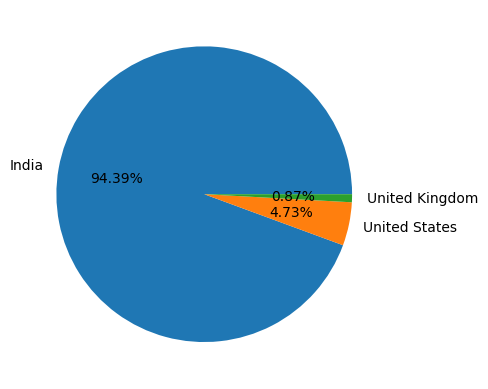

In [52]:
# plotting them in a pie to vizualize the top 3 countries which have the most transactions in this zomato dataset
plt.pie(country_counts[:3], labels=country_names[:3],autopct='%1.2f%%')

##### *As we see India contributes to around 94.39% of transactions in Zomato, followed by US (4.73%) and UK (0.87%)*